# MLE challenge - Features engineering

### Notebook 1

In this notebook we compute five features for the **credit risk** dataset. 
Each row in the dataset consists of the credit that a user took on a given date.

These features are roughly defined as follows:

**nb_previous_loans:** number of loans granted to a given user, before the current loan.

**avg_amount_loans_previous:** average amount of loans granted to a user, before the current rating.

**age:** user age in years.

**years_on_the_job:** years the user has been in employment.

**flag_own_car:** flag that indicates if the user has his own car.

We have the following problem: the feature `avg_amount_loans_previous` takes just too long to be computed for all the rows of the dataset (at least the way it's implemented).




# In this aproximation ...

I use some aditional features only with demostrative propuses.


In [1]:
import pandas as pd
import time
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset_credit_risk.csv')

In [3]:
df.shape

(777715, 24)

In [4]:
df.head()

,loan_id,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,...,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,status,birthday,job_start_date,loan_date,loan_amount
0,208089,5044500,F,N,Y,0,45000.0,Pensioner,Secondary / secondary special,Widow,...,0,0,0,NaN,1.0,0,1955-08-04,3021-09-18,2019-01-01,133.714974
1,112797,5026631,F,N,Y,0,99000.0,Working,Secondary / secondary special,Separated,...,0,0,0,Medicine staff,1.0,0,1972-03-30,1997-06-05,2019-01-01,158.800558
2,162434,5036645,M,Y,N,0,202500.0,Working,Incomplete higher,Married,...,0,0,0,Drivers,2.0,0,1987-03-24,2015-02-22,2019-01-01,203.608487
3,144343,5033584,F,N,Y,0,292500.0,Working,Higher education,Married,...,0,0,0,NaN,2.0,0,1973-03-15,2009-06-29,2019-01-01,113.204964
4,409695,5085755,F,Y,Y,1,112500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,0,0,0,Core staff,3.0,0,1989-10-15,2019-07-03,2019-01-01,109.376260


In [5]:
df.describe()

,loan_id,id,cnt_children,amt_income_total,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,cnt_fam_members,status,loan_amount
count,777715.000000,7.777150e+05,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000,777715.000000
mean,389857.000000,5.078743e+06,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837,0.014883,129.526121
std,224507.126639,4.180442e+04,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380,0.121086,33.813699
min,1000.000000,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,100.000045
25%,195428.500000,5.044568e+06,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,107.230141
50%,389857.000000,5.069530e+06,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,118.240615
75%,584285.500000,5.115551e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,139.339694
max,778714.000000,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,1.000000,819.872581


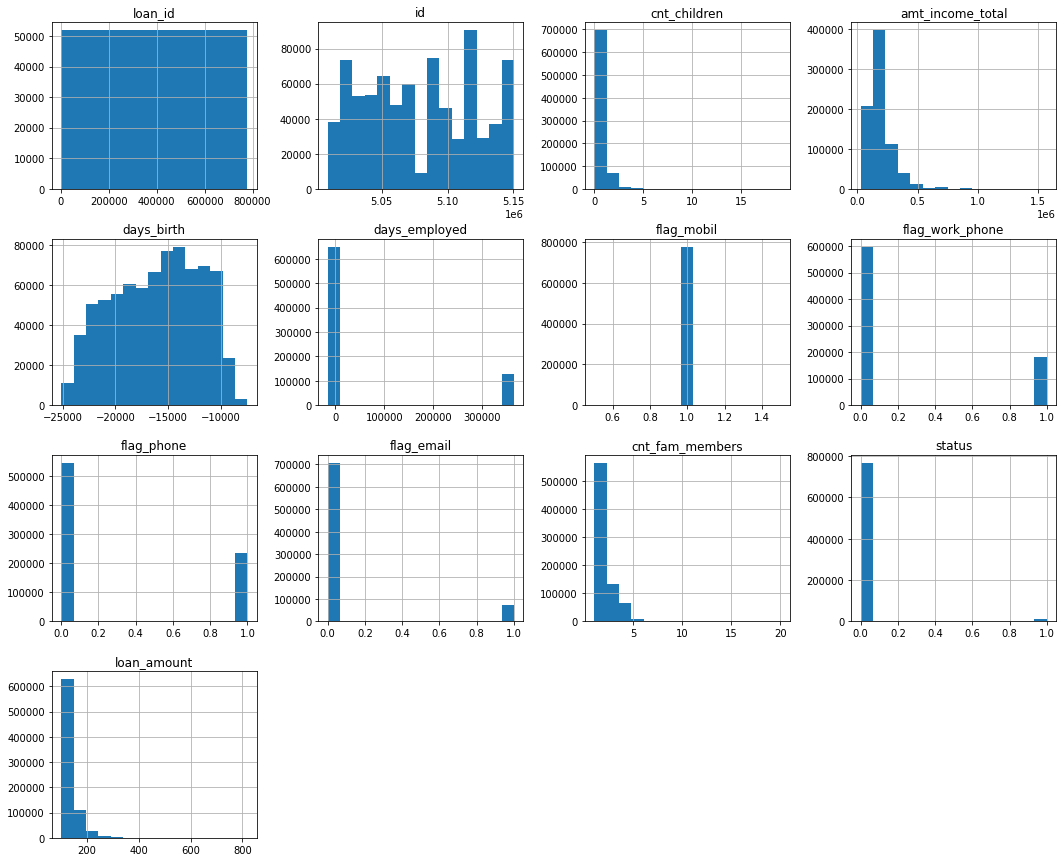

In [6]:
df.hist(bins=15, figsize=(18, 15))    
features = ['code_gender', 'flag_own_car', 'flag_own_realty',
       'cnt_children', 'amt_income_total', 'name_income_type',
       'name_education_type', 'name_family_status', 'name_housing_type',
       'occupation_type', 'cnt_fam_members',
       'status', 'loan_amount']

In [7]:

#plt.figure(figsize=(20, 10))
#sns.pairplot(df[features], hue='name_income_type')

In [8]:
df["loan_date"] = pd.to_datetime(df.loan_date)
df = df.sort_values(by=["id", "loan_date"])
df.head()

,loan_id,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,...,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,status,birthday,job_start_date,loan_date,loan_amount
33549,1008,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,1,0,0,NaN,2.0,0,1988-11-04,2009-04-11,2019-02-01,102.283361
48621,1000,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,1,0,0,NaN,2.0,0,1988-11-04,2009-04-11,2019-02-15,136.602049
51038,1012,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,1,0,0,NaN,2.0,0,1988-11-04,2009-04-11,2019-02-17,114.733694
149135,1011,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,1,0,0,NaN,2.0,0,1988-11-04,2009-04-11,2019-05-20,103.539050
197200,1003,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,...,1,0,0,NaN,2.0,0,1988-11-04,2009-04-11,2019-07-05,112.948147


### Get information only based in the last loan 

In [9]:
features = ['id',
            'loan_amount',
            'flag_own_car',
            'flag_own_realty',
            'cnt_fam_members',
            'amt_income_total',
            'name_income_type',
            'birthday', 
            'job_start_date',
            'status']

df_last_loan = (df[features]
        .groupby('id', as_index=False, group_keys=False)
        .agg({'loan_amount' : [lambda x: x.iloc[:-1].mean(), 'count'],
              'flag_own_car' : 'last',
              'flag_own_realty' : 'last',
              'cnt_fam_members' : 'last', #cnt_children muy correlacionadas
              'amt_income_total' : 'last',
              'name_income_type' : 'last',
              'birthday' : 'last', 
              'job_start_date' : 'last',
              'status' : 'last'}) 
       )

df_last_loan.columns = ['id', 
                     'avg_amount_loans_previous', 
                     'nb_previous_loans', 
                     'flag_own_car',
                     'flag_own_realty',
                     'cnt_fam_members',
                     'amt_income_total',
                     'name_income_type',
                     'birthday', 
                     'job_start_date',
                     'status']
df_last_loan.head()

,id,avg_amount_loans_previous,nb_previous_loans,flag_own_car,flag_own_realty,cnt_fam_members,amt_income_total,name_income_type,birthday,job_start_date,status
0,5008804,128.906371,16,Y,Y,2.0,427500.0,Working,1988-11-04,2009-04-11,0
1,5008805,123.938950,15,Y,Y,2.0,427500.0,Working,1988-11-04,2009-04-11,0
2,5008806,136.446864,30,Y,Y,2.0,112500.0,Working,1962-12-02,2018-08-10,0
3,5008808,125.327722,5,N,Y,1.0,270000.0,Commercial associate,1969-05-23,2013-05-11,0
4,5008809,113.006746,5,N,Y,1.0,270000.0,Commercial associate,1969-05-23,2013-05-11,0


#### Feature nb_previous_loans

In [10]:
df_last_loan['nb_previous_loans'] = df_last_loan['nb_previous_loans'] - 1

#### Feature age

In [11]:
df_last_loan['birthday'] = pd.to_datetime(df_last_loan['birthday'], errors='coerce')

In [12]:
df_last_loan['age'] = (pd.to_datetime('today').normalize() - df_last_loan['birthday']).dt.days // 365

#### Feature years_on_the_job

In [14]:
df_last_loan['job_start_date'] = pd.to_datetime(df_last_loan['job_start_date'], errors='coerce')

In [15]:
df_last_loan['years_on_the_job'] = (pd.to_datetime('today').normalize() - df_last_loan['job_start_date']).dt.days // 365

#### Feature flag_own_car, flag_own_realty

In [16]:
df_last_loan['flag_own_car'] = df_last_loan.flag_own_car.apply(lambda x : 0 if x == 'N' else 1)
df_last_loan['flag_own_realty'] = df_last_loan.flag_own_realty.apply(lambda x : 0 if x == 'N' else 1)

#### Extra features

In [17]:
df_last_loan['cnt_fam_members'] = df_last_loan['cnt_fam_members'].astype('int')

## Save dataset for model training

In [18]:
df_train = df_last_loan[['id',
                         'age',
                         'years_on_the_job',
                         'nb_previous_loans',
                         'avg_amount_loans_previous',
                         'flag_own_car',
                         'flag_own_realty',
                         'cnt_fam_members',
                         'amt_income_total',
                         'name_income_type',
                         'status']]
df_train.to_csv('train_model.csv', index=False)

inicio = time.time()
df['flag_own_car'].replace({'N':0, 'Y':1})
print(time.time() - inicio)

In [27]:
df_train.tail(5)

,id,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car,flag_own_realty,cnt_fam_members,amt_income_total,name_income_type,status
36452,5150482,29,4.0,17,120.942745,1,1,3,157500.0,Working,0
36453,5150483,29,4.0,17,140.274502,1,1,3,157500.0,Working,0
36454,5150484,29,4.0,12,123.916797,1,1,3,157500.0,Working,0
36455,5150485,29,4.0,1,110.314737,1,1,3,157500.0,Working,0
36456,5150487,53,6.0,29,129.798262,1,0,2,202500.0,Working,0
